<a href="https://colab.research.google.com/github/Sripoojitha3/Unified-tasks/blob/main/bird_strikes%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat

pd.set_option('display.max_columns', 50)

In [ ]:
bird_strikes = pd.read_csv("Bird Strikes data 1.csv", low_memory=False, thousands=',', encoding='latin-1')

In [ ]:
bird_strikes.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,25-07-2001 00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,14-09-2001 00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,23-06-2003 00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [ ]:
bird_strikes.dtypes

Record ID                                    int64
Aircraft: Type                              object
Airport: Name                               object
Altitude bin                                object
Aircraft: Make/Model                        object
Wildlife: Number struck                     object
Wildlife: Number Struck Actual               int64
Effect: Impact to flight                    object
FlightDate                                  object
Effect: Indicated Damage                    object
Aircraft: Number of engines?                object
Aircraft: Airline/Operator                  object
Origin State                                object
When: Phase of flight                       object
Conditions: Precipitation                   object
Remains of wildlife collected?                bool
Remains of wildlife sent to Smithsonian       bool
Remarks                                     object
Wildlife: Size                              object
Conditions: Sky                

In [ ]:
bird_strikes['FlightDate']=pd.to_datetime(bird_strikes['FlightDate'].str[:-5])
bird_strikes['Year']=bird_strikes['FlightDate'].dt.year
bird_strikes['Month']=bird_strikes['FlightDate'].dt.month
bird_strikes['Month and Year']=bird_strikes['FlightDate'].dt.strftime('%b %Y')

def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Fall'
    else:
        return 'Winter'

def get_region(state):
    if state in('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'):
        return 'Northeast'
    elif state in ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'):
        return 'Midwest'
    elif state in ('DC', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia'):
        return 'South'
    elif state in ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington', 'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'):
        return 'West'
    elif state == 'Virgin Islands':
        return 'Virgin Islands'
    elif state == 'Puerto Rico':
        return 'Puerto Rico'
    else:
        return 'Canada'

bird_strikes['Region']=bird_strikes['Origin State'].apply(get_region)
bird_strikes['Season']=bird_strikes['Month'].apply(get_season)

<ipython-input-14-2c8b40322f56>:1: UserWarning: Parsing dates in %d-%m-%Y  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bird_strikes['FlightDate']=pd.to_datetime(bird_strikes['FlightDate'].str[:-5])


In [ ]:
strikes_per_year=Counter(bird_strikes['Year'])
years=list(strikes_per_year.keys())
strikes_years = list(strikes_per_year.values())

#Count how many bird strikes happened per Season
strikes_per_season=Counter(bird_strikes['Season'])
seasons=list(strikes_per_season.keys())
strikes_seasons=list(strikes_per_season.values())

#Count how many bird strikes happened per Month
strikes_per_tod = Counter(bird_strikes['Month'])
tod=list(strikes_per_tod.keys())
strikes_tod=list(strikes_per_tod.values())

#Count how many bird strikes included a warning for the pilot
strikes_per_damage = Counter(bird_strikes['Effect: Indicated Damage'])
damages= list(strikes_per_damage.keys())
strikes_damage=list(strikes_per_damage.values())

#Count how many bird strikes occured with each wildlife size
strikes_per_size =Counter(bird_strikes['Wildlife: Size'])
size= list(strikes_per_size.keys())
strikes_size=list(strikes_per_size.values())

strikes_per_phase = Counter(bird_strikes['When: Phase of flight'])
phase= list(strikes_per_phase.keys())
strikes_phase=list(strikes_per_phase.values())

[Text(0, 0.5, 'Strikes'),
 Text(0.5, 0, 'Phase of Flight'),
 Text(0.5, 1.0, 'Strikes per Phase of Flight')]

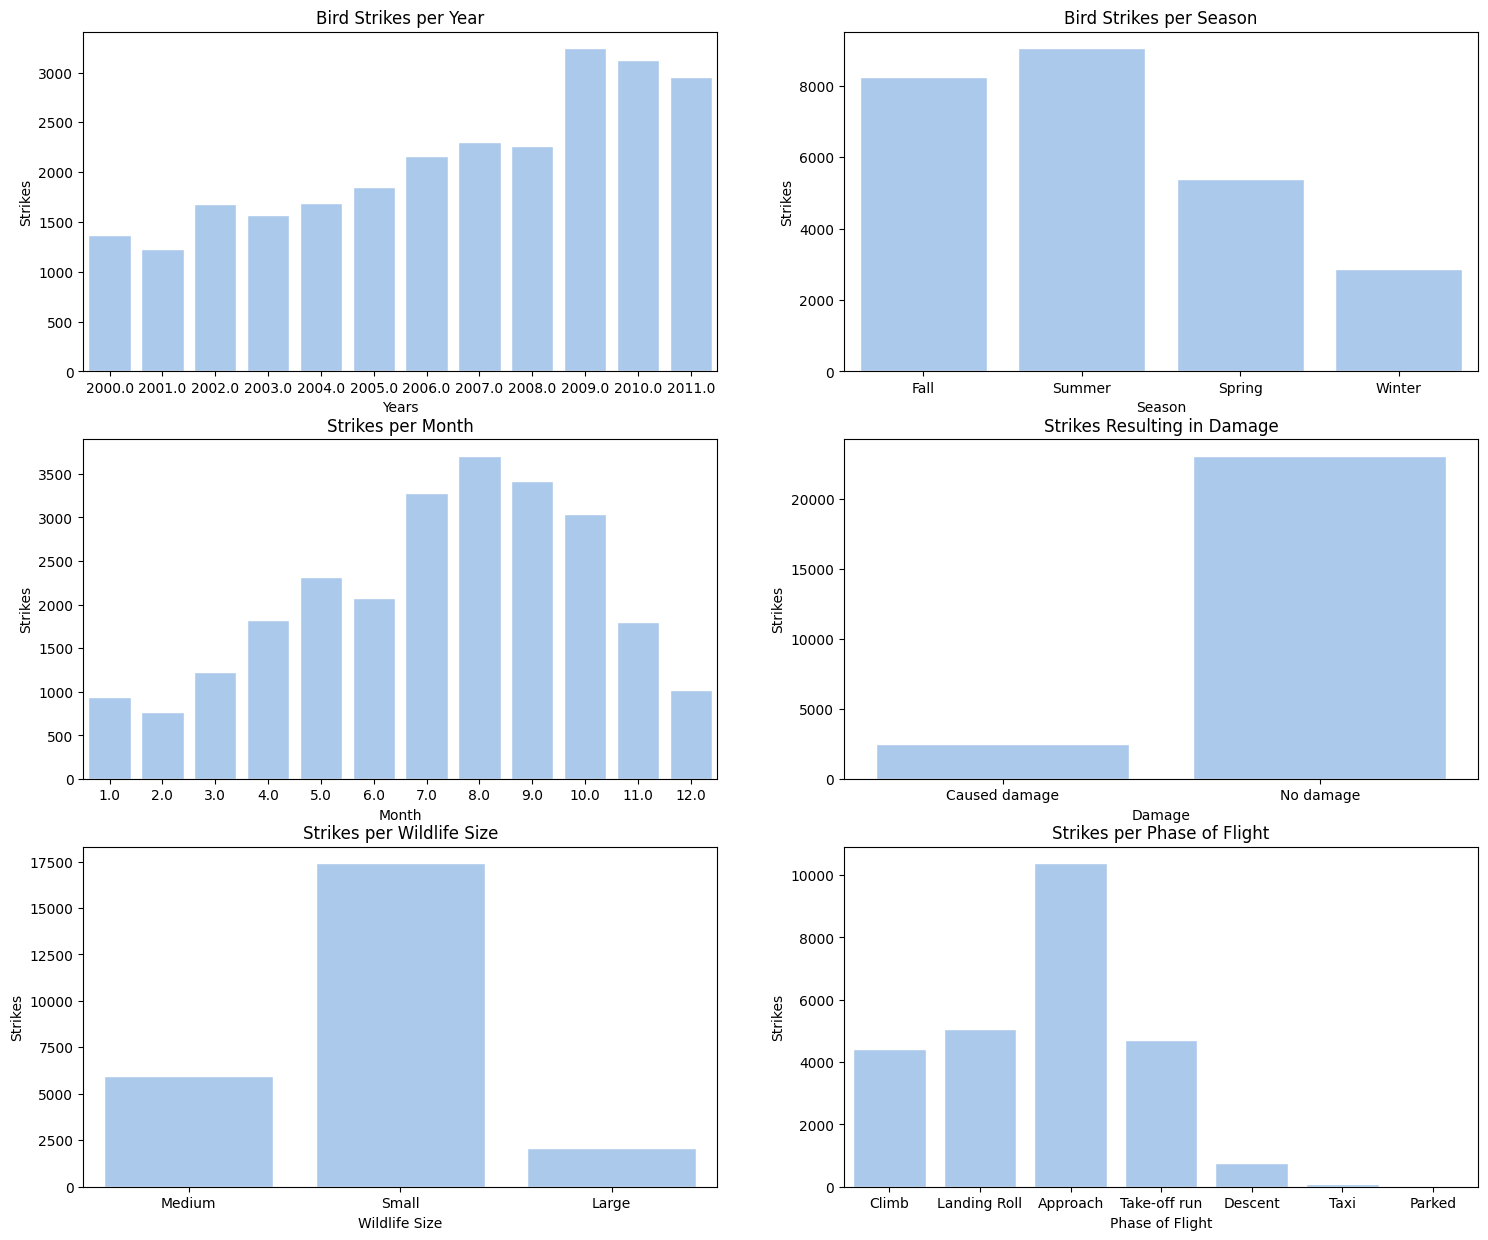

In [ ]:
fig=plt.figure(figsize=(18,15))
ax1= fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
#Add seaborn styles to plots
sns.set(style='whitegrid')
sns.set_color_codes('pastel')

sns.barplot(x=years, y=strikes_years, color='b', ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Years', title='Bird Strikes per Year')

sns.barplot(x=seasons, y=strikes_seasons, color='b', ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Season', title='Bird Strikes per Season')

sns.barplot(x=tod, y=strikes_tod, color='b', ax=ax3)
ax3.set(ylabel='Strikes', xlabel='Month', title='Strikes per Month')

sns.barplot(x=damages, y=strikes_damage, color='b', ax=ax4)
ax4.set(ylabel='Strikes', xlabel='Damage', title='Strikes Resulting in Damage')

sns.barplot(x=size, y=strikes_size, color='b', ax=ax5)
ax5.set(ylabel='Strikes', xlabel='Wildlife Size', title='Strikes per Wildlife Size')

sns.barplot(x=phase, y=strikes_phase, color='b', ax=ax6)
ax6.set(ylabel='Strikes', xlabel='Phase of Flight', title='Strikes per Phase of Flight')

In [ ]:
strikes_per_impact=Counter(bird_strikes['Effect: Impact to flight'])
impacts=list(strikes_per_impact.keys())
impact_strikes=list(strikes_per_impact.values())

strikes_per_damage=Counter(bird_strikes['Effect: Indicated Damage'])
damages=list(strikes_per_damage.keys())
damage_strikes=list(strikes_per_damage.values())

[Text(0, 0.5, 'Strikes'),
 Text(0.5, 0, 'Damage'),
 Text(0.5, 1.0, 'Strikes per Damage')]

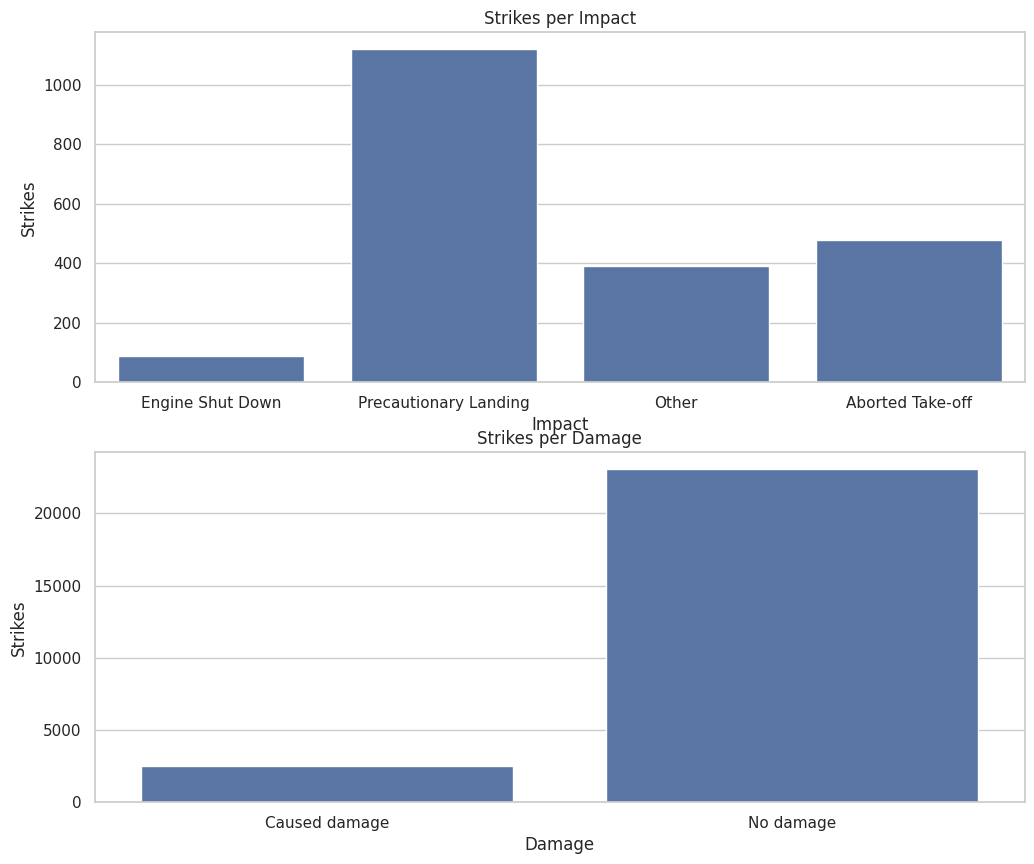

In [ ]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

#lt.tight_layout()

sns.barplot(x=impacts, y=impact_strikes, ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Impact', title='Strikes per Impact')

sns.barplot(x=damages, y=damage_strikes, ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Damage', title="Strikes per Damage")

[Text(0.5, 76.24999999999999, 'Year'),
 Text(0.5, 1.0, 'Top 10 Airports with the Greatest Yearly Averge Strikes')]

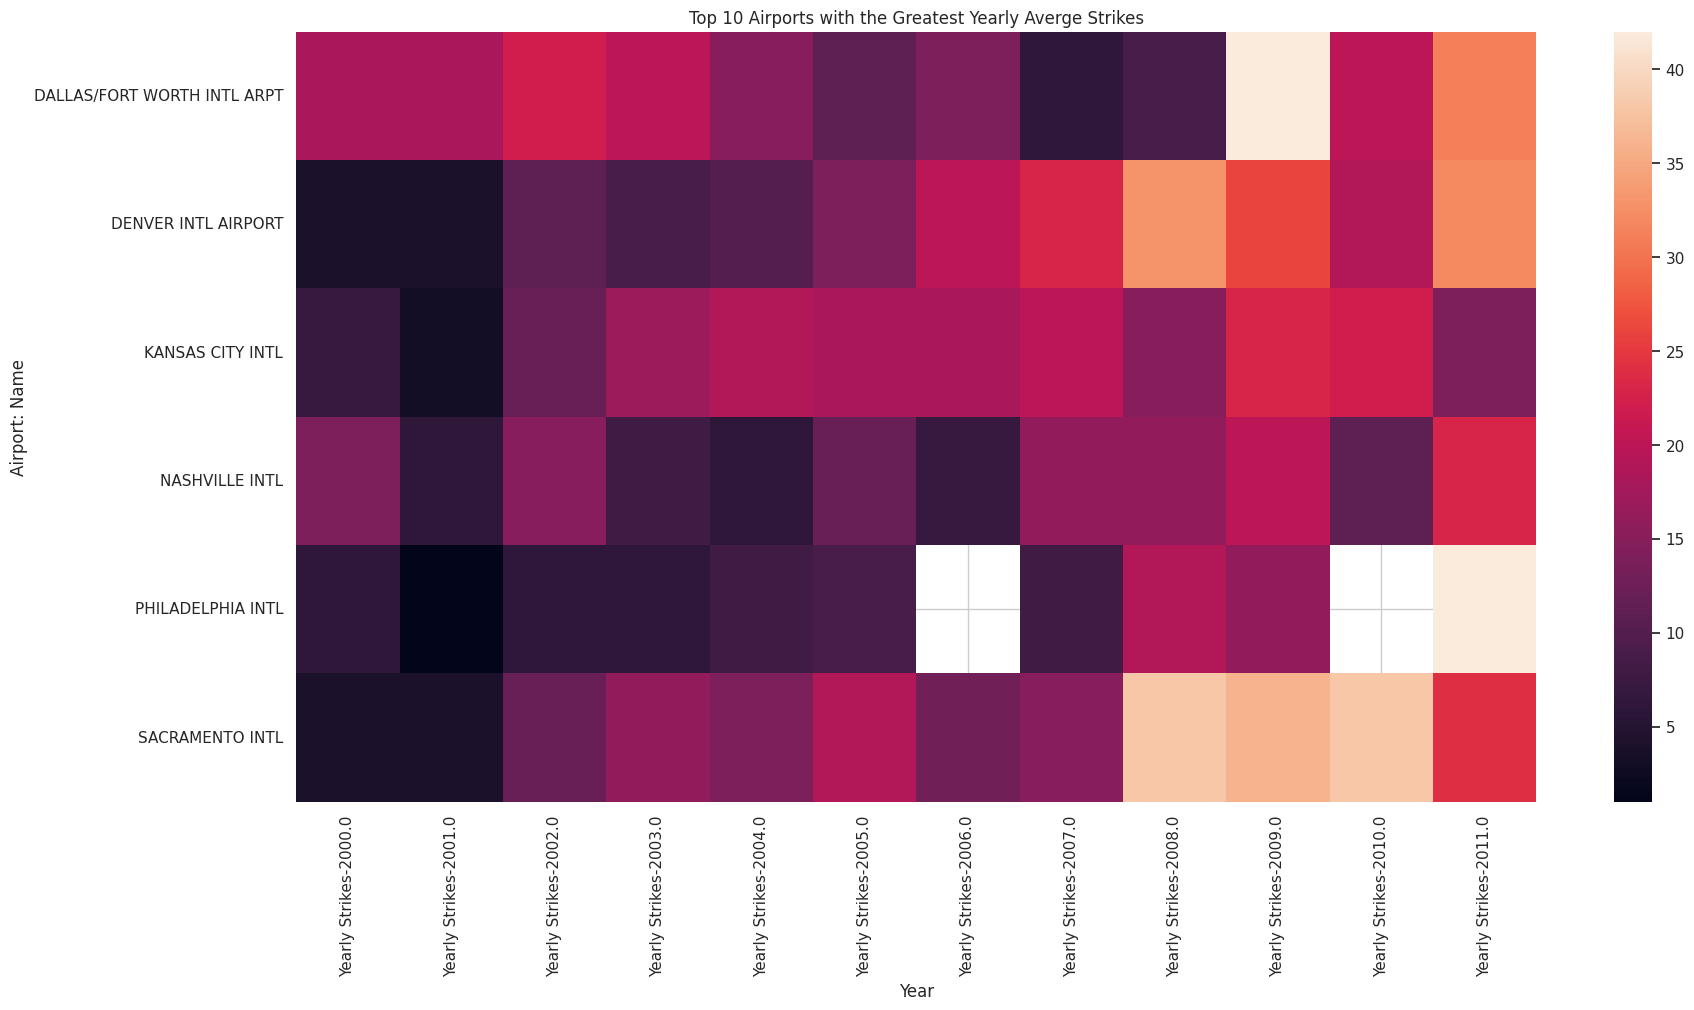

In [ ]:
airport_yr_tot=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Year', 'Airport: Name']).size().to_frame('Yearly Strikes')
airport_yr_tot.reset_index(level=[0,1], inplace=True)

airport_yr_avg=airport_yr_tot.groupby(['Airport: Name'])['Yearly Strikes'].mean().to_frame('Yearly Avg')
airport_yr_avg.reset_index(level=0, inplace=True)

airport_total=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Airport: Name']).size().to_frame('Total Strikes')


airport=pd.merge(airport_yr_tot, airport_total, on='Airport: Name')
airport=pd.merge(airport, airport_yr_avg, on= 'Airport: Name')
airport=airport.sort_values('Yearly Avg', ascending=False).head(70)

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

sns.heatmap(airport.pivot_table(index='Airport: Name', columns='Year', values=['Yearly Strikes']), ax=ax1)
ax1.set(xlabel='Year', title='Top 10 Airports with the Greatest Yearly Averge Strikes')

[Text(0.5, 0, 'Total Strikes'),
 Text(0.5, 1.0, 'Total Strikes by Airline/Operator')]

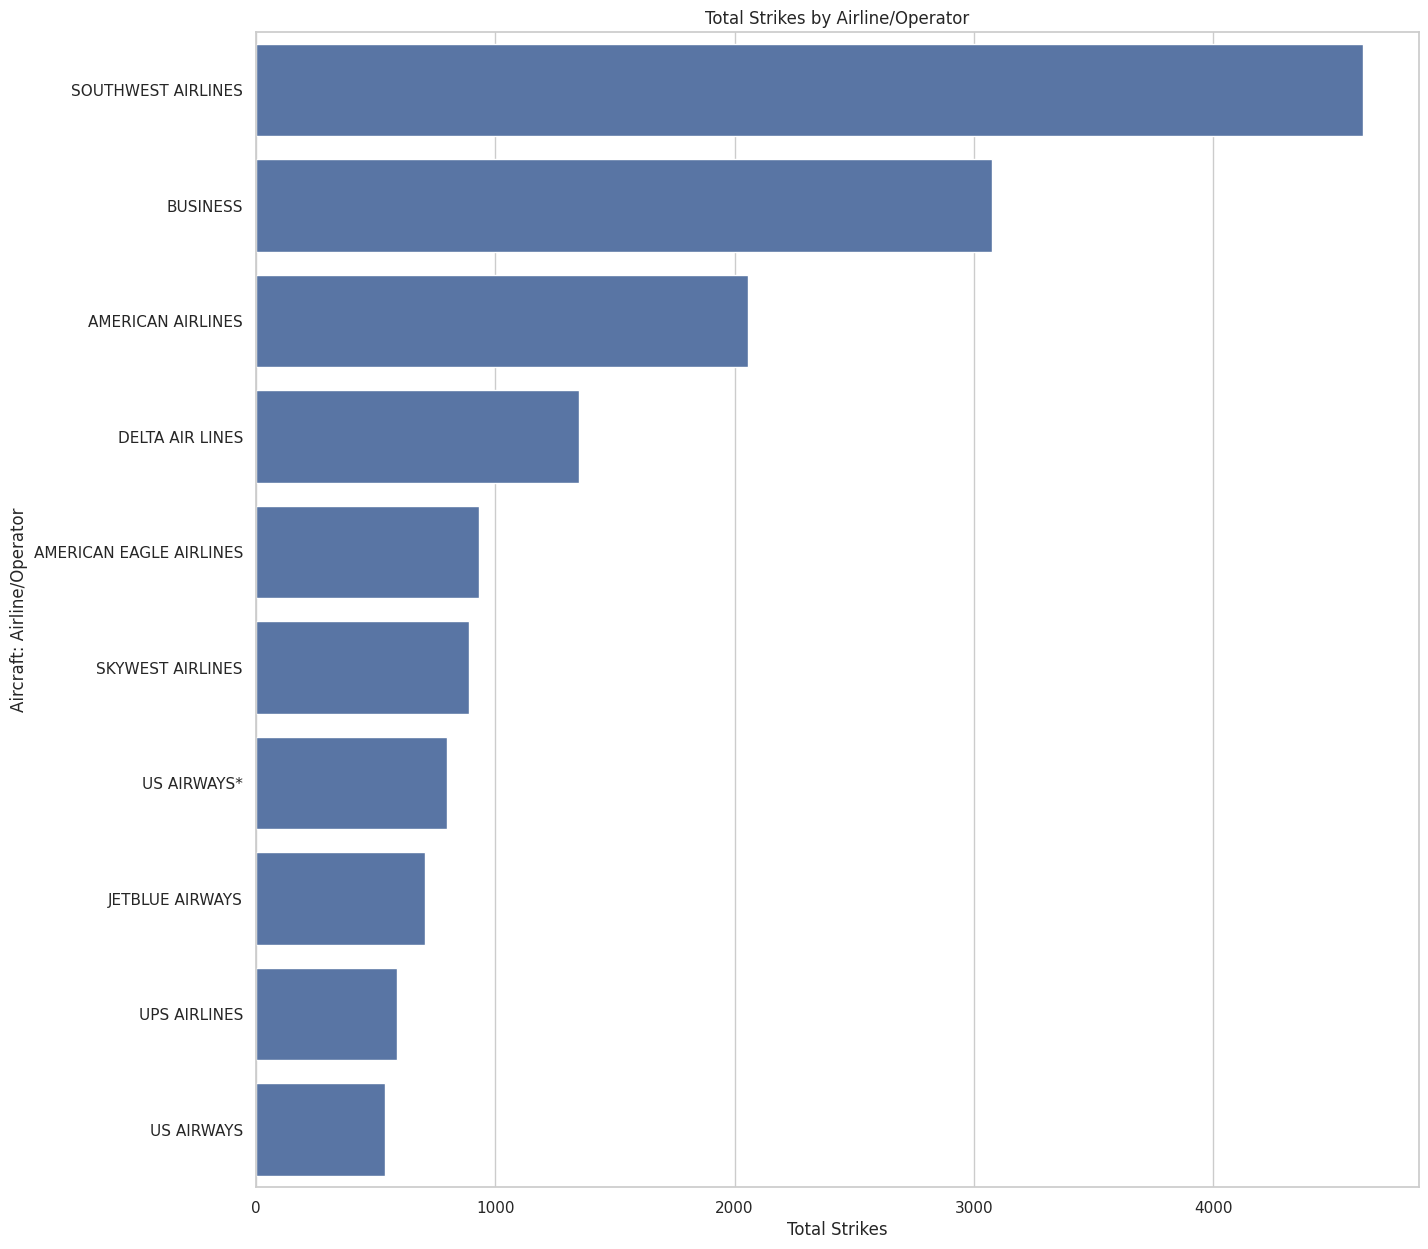

In [ ]:
airline_strikes=bird_strikes.groupby(['Aircraft: Airline/Operator']).size().to_frame('Total Strikes')
airline_strikes.reset_index(level=0, inplace=True)

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111)
airline_strikes.sort_values(['Total Strikes'], inplace=True, ascending=False)
airline_strikes=airline_strikes.loc[airline_strikes['Aircraft: Airline/Operator'] != 'UNKNOWN'].head(10)
sns.barplot(x='Total Strikes', y='Aircraft: Airline/Operator', data=airline_strikes, ax=ax1)
ax1.set(xlabel='Total Strikes', title='Total Strikes by Airline/Operator')